# Разведочный анализ данных и препроцессинг

## Установка дополнительных библиотек

In [2]:
%pip install ImbalancedLearningRegression -q

Note: you may need to restart the kernel to use updated packages.


## Импорт всех необходимых библиотек 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.preprocessing import MinMaxScaler
from ImbalancedLearningRegression import adasyn, ro, smote 

In [3]:
#Дополнительные настройки
import warnings
warnings.simplefilter("ignore")
sns.set_style('dark')
%matplotlib inline

## Разведочный анализ данных

Целью является выполнение краткого анализа данных и определения свойств переменных и взаимосвязей между ними.

Необходимо:
* нарисовать гистограммы распределения каждой из переменной; 
* диаграммы ящика с усами;
* попарные графики рассеяния точек;
* для каждой колонке получить среднее, медианное значение;
* провести анализ и исключение выбросов;
* проверить наличие пропусков.

## Загрузка данных 

In [4]:
x_bp = pd.read_excel('../datasets/X_bp.xlsx', index_col=0)
x_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0.0                         1.857143            2030.0             738.736842   
1.0                         1.857143            2030.0             738.736842   
2.0                         1.857143            2030.0             738.736842   
3.0                         1.857143            2030.0             738.736842   
4.0                         2.771331            2030.0             753.000000   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0.0                        30.00                        22.267857   
1.0                        50.00                        23.750000   
2.0                        49.90                        33.000000   
3.0                       129.00                        21.250000   
4.0                       111.86                        22.267857   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0.0                100.000000                          210.0   
1.0                284.615385                          210.0   
2.0                284.615385                          210.0   
3.0                300.000000                          210.0   
4.0                284.615385                          210.0   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0.0                                  70.0                         3000.0   
1.0                                  70.0                         3000.0   
2.0                                  70.0                         3000.0   
3.0                                  70.0                         3000.0   
4.0                                  70.0                         3000.0   

     Потребление смолы, г/м2  
0.0                    220.0  
1.0                    220.0  
2.0                    220.0  
3.0                    220.0  
4.0                    220.0

In [5]:
x_nup = pd.read_excel('../datasets/X_nup.xlsx', index_col=0)
x_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                 0.0          4.0               57.0
1.0                 0.0          4.0               60.0
2.0                 0.0          4.0               70.0
3.0                 0.0          5.0               47.0
4.0                 0.0          5.0               57.0

#### Объединение датафреймов по индексу тип объединения INNER

In [6]:
df = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df.tail().T

1018.0       1019.0       1020.0  \
Соотношение матрица-наполнитель          2.271346     3.444022     3.280604   
Плотность, кг/м3                      1952.087902  2050.089171  1972.372865   
модуль упругости, ГПа                  912.855545   444.732634   416.836524   
Количество отвердителя, м.%             86.992183   145.981978   110.533477   
Содержание эпоксидных групп,%_2         20.123249    19.599769    23.957502   
Температура вспышки, С_2               324.774576   254.215401   248.423047   
Поверхностная плотность, г/м2          209.198700   350.660830   740.142791   
Модуль упругости при растяжении, ГПа    73.090961    72.920827    74.734344   
Прочность при растяжении, МПа         2387.292495  2360.392784  2662.906040   
Потребление смолы, г/м2                125.007669   117.730099   236.606764   
Угол нашивки, град                      90.000000    90.000000    90.000000   
Шаг нашивки                              9.076380    10.565614     4.161154   
Плотность нашивки                       47.019770    53.750790    67.629684   

                                           1021.0       1022.0  
Соотношение матрица-наполнитель          3.705351     3.808020  
Плотность, кг/м3                      2066.799773  1890.413468  
модуль упругости, ГПа                  741.475517   417.316232  
Количество отвердителя, м.%            141.397963   129.183416  
Содержание эпоксидных групп,%_2         19.246945    27.474763  
Температура вспышки, С_2               275.779840   300.952708  
Поверхностная плотность, г/м2          641.468152   758.747882  
Модуль упругости при растяжении, ГПа    74.042708    74.309704  
Прочность при растяжении, МПа         2071.715856  2856.328932  
Потребление смолы, г/м2                197.126067   194.754342  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              6.313201     6.078902  
Плотность нашивки                       58.261074    77.434468

In [10]:
#Размерность
df.shape

(1023, 13)

In [11]:
#Описательная статистика
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

In [12]:
#Сделаем проверку на пропуски
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [13]:
#Проверим типы
df.dtypes

Соотношение матрица-наполнитель         float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Количество отвердителя, м.%             float64
Содержание эпоксидных групп,%_2         float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
Угол нашивки, град                      float64
Шаг нашивки                             float64
Плотность нашивки                       float64
dtype: object

In [14]:
#Проверим есть ли дубликаты
df.duplicated().sum()

0

In [15]:
# Уникальные значения
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

#### Гистограммы распределения и "ящики с усами" 

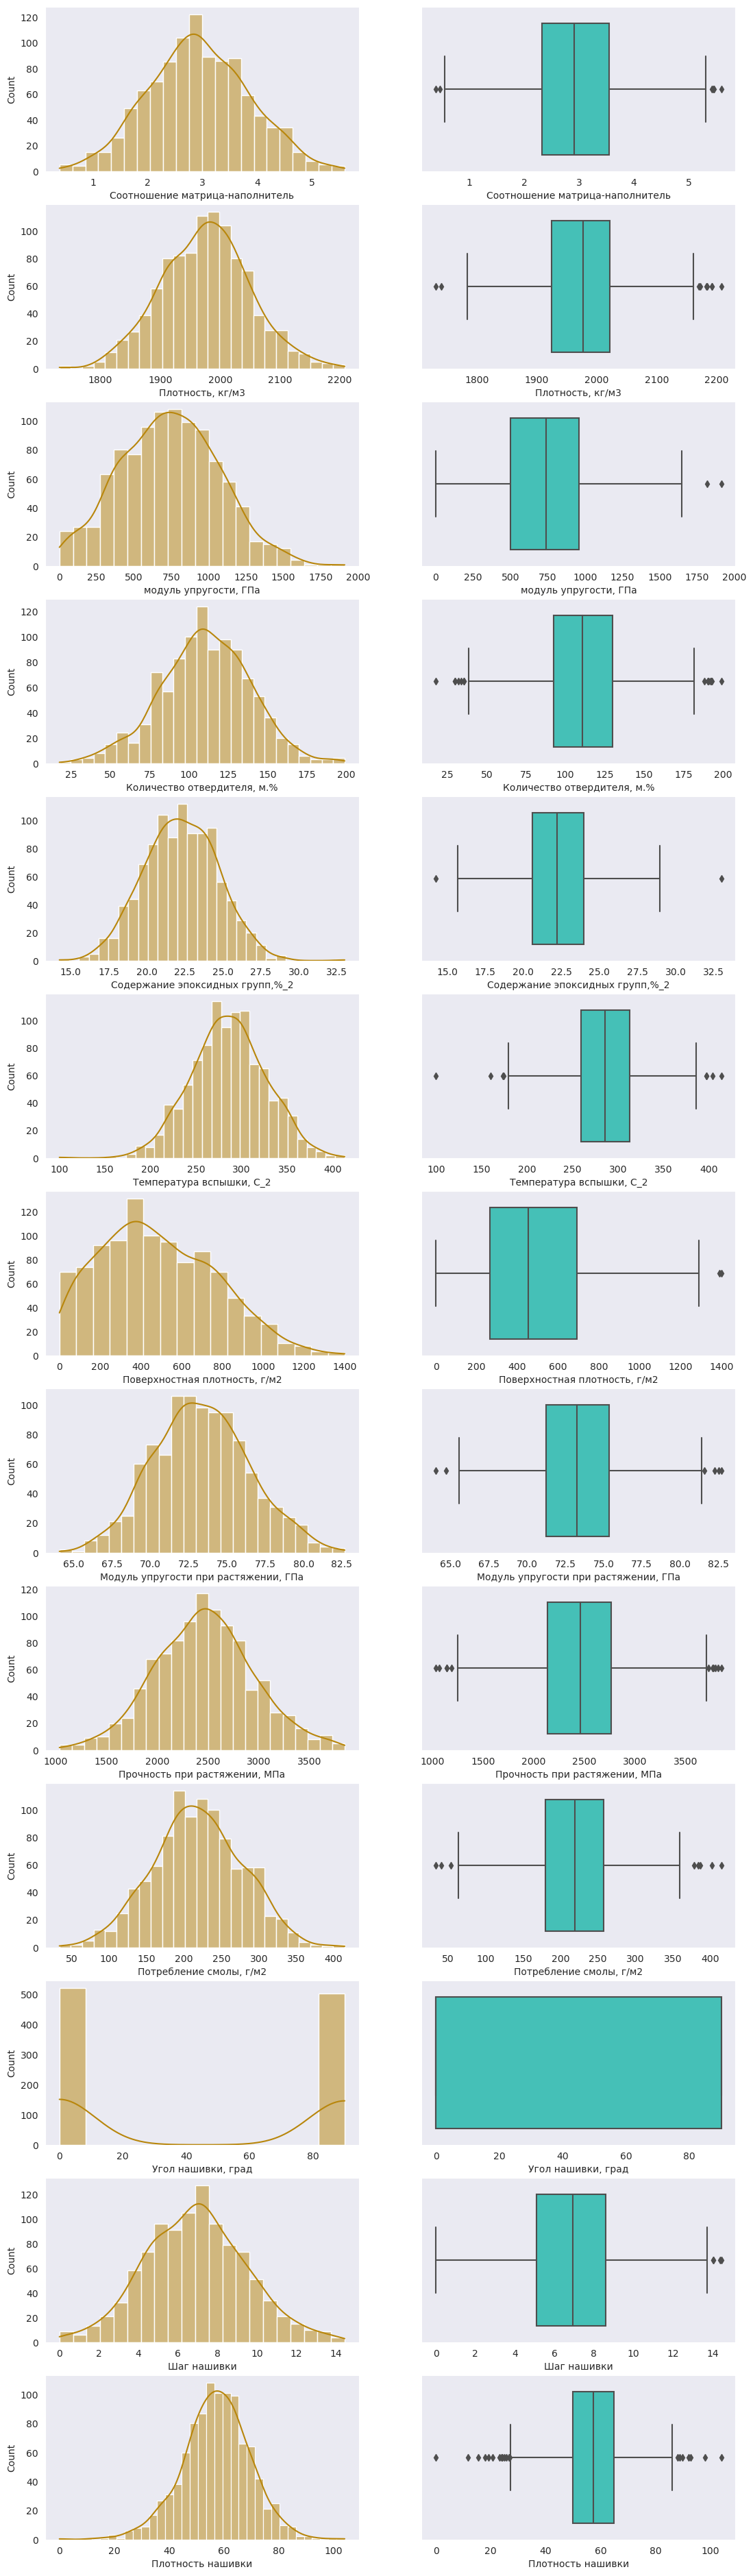

In [34]:
def hist_and_box(dataframe):
    fig, axes = plt.subplots(13, 2, figsize=(13, 48))
    for row, column in enumerate(df.columns):    
        sns.histplot(data=df, x=column, kde=True, ax=axes[row, 0], color = '#b8860b')
        sns.boxplot(data=df, x=column, ax=axes[row, 1], color = '#30d5c8')
    plt.show()

hist_and_box(df)

In [17]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

#### Проверим признаки на нормальное распределение

In [18]:
gauss_dist = []
other_dist = []

for col in df.columns:
    alpha = 0.05
    stat, p = normaltest(df[col]) # Критерий согласия Пирсона
    if p > alpha:
        gauss_dist.append(col)
    else:
        other_dist.append(col)
print(f'Распределение Гаусса: {gauss_dist}')
print()
print(f'Другое распределение : {other_dist}')

Распределение Гаусса: ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки']

Другое распределение : ['Поверхностная плотность, г/м2', 'Угол нашивки, град', 'Плотность нашивки']


#### Корреляционная тепловая карта

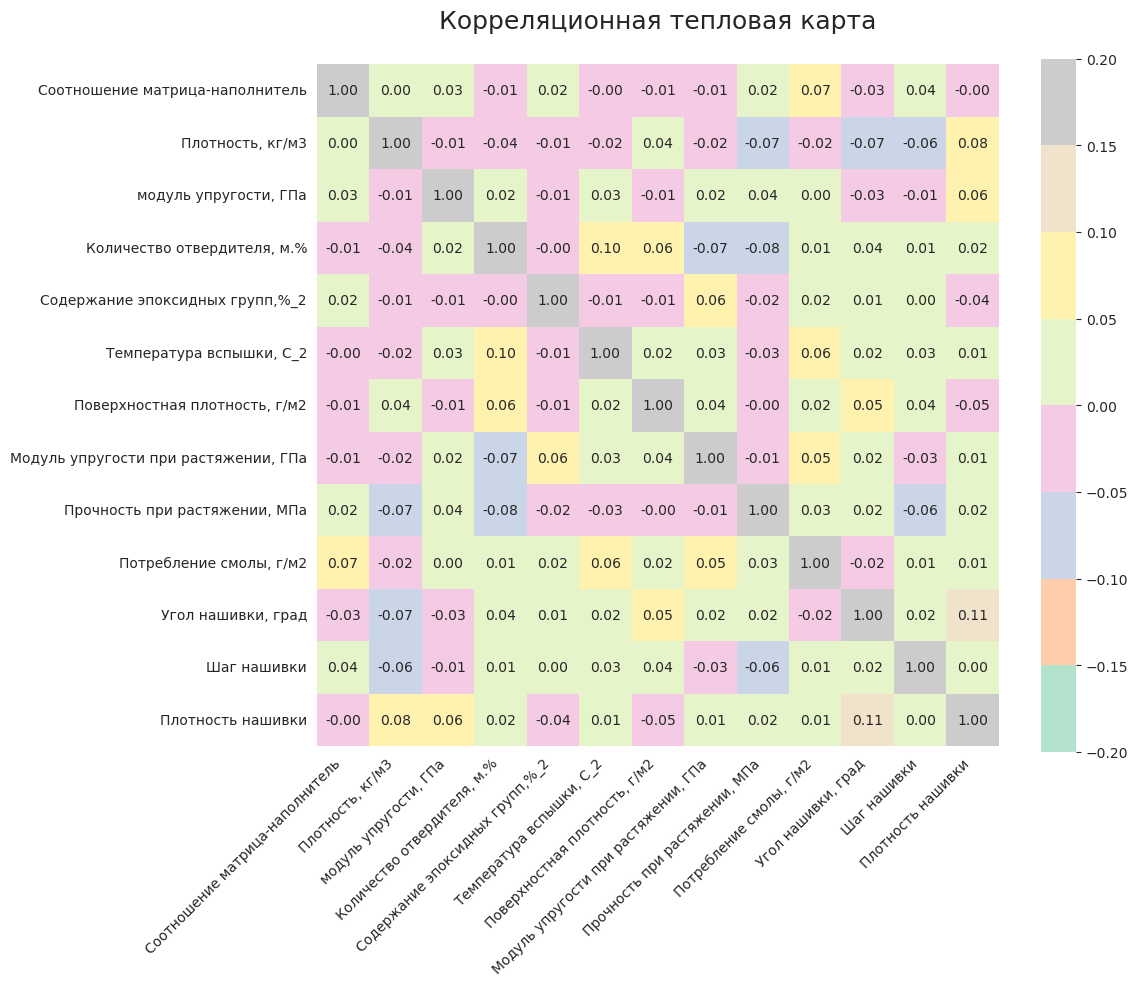

In [19]:
correlations = df.corr()
def heat_map(corr_func):
    plt.figure(figsize=(11, 9))
    ax = sns.heatmap(correlations,vmin=-0.2,vmax=0.2, square=True, annot=True, 
                    fmt='.2f', linecolor='white', cmap="Pastel2")
    plt.xticks(rotation=45, ha='right')
    plt.title("Корреляционная тепловая карта\n ", fontsize=18)
    plt.show()

heat_map(correlations)

Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет `0.10`, что говорит об отсутствии зависимости между этими данными. Корреляция между всеми параметрами очень близка к `0`, что говорит об отсутствии корреляционных связей между переменными.

#### Очистим данные от выбросов

In [7]:
for col in df.columns:
    q75,q25 = np.quantile(df.loc[:,col],[0.75,0.25])
    iqr = q75 - q25

    min = q25-(1.5*iqr)
    max = q75+(1.5*iqr)

    # заменим на нулевые значения
    df.loc[df[col] < min,col] = np.nan
    df.loc[df[col] > max,col] = np.nan

df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [8]:
# удалим строки с нулевыми значениями
df = df.dropna(axis=0)
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

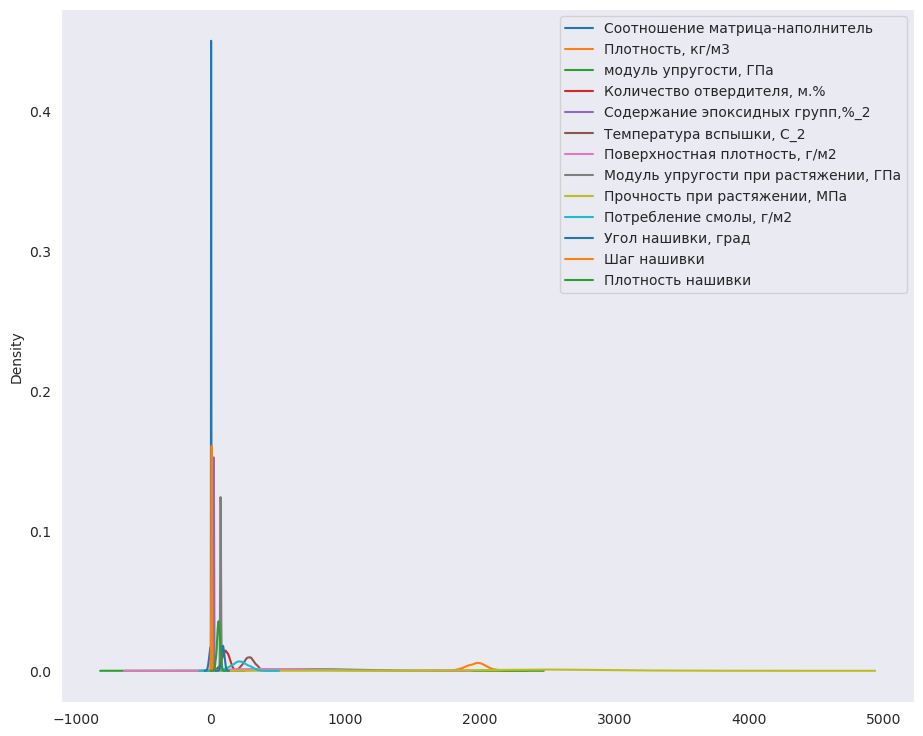

In [10]:
#оценим плотность ядра
def kde(df):
  fig, ax = plt.subplots(figsize=(11, 9))
  df.plot(kind='kde', ax=ax)
kde(df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 936 entries, 1.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки 

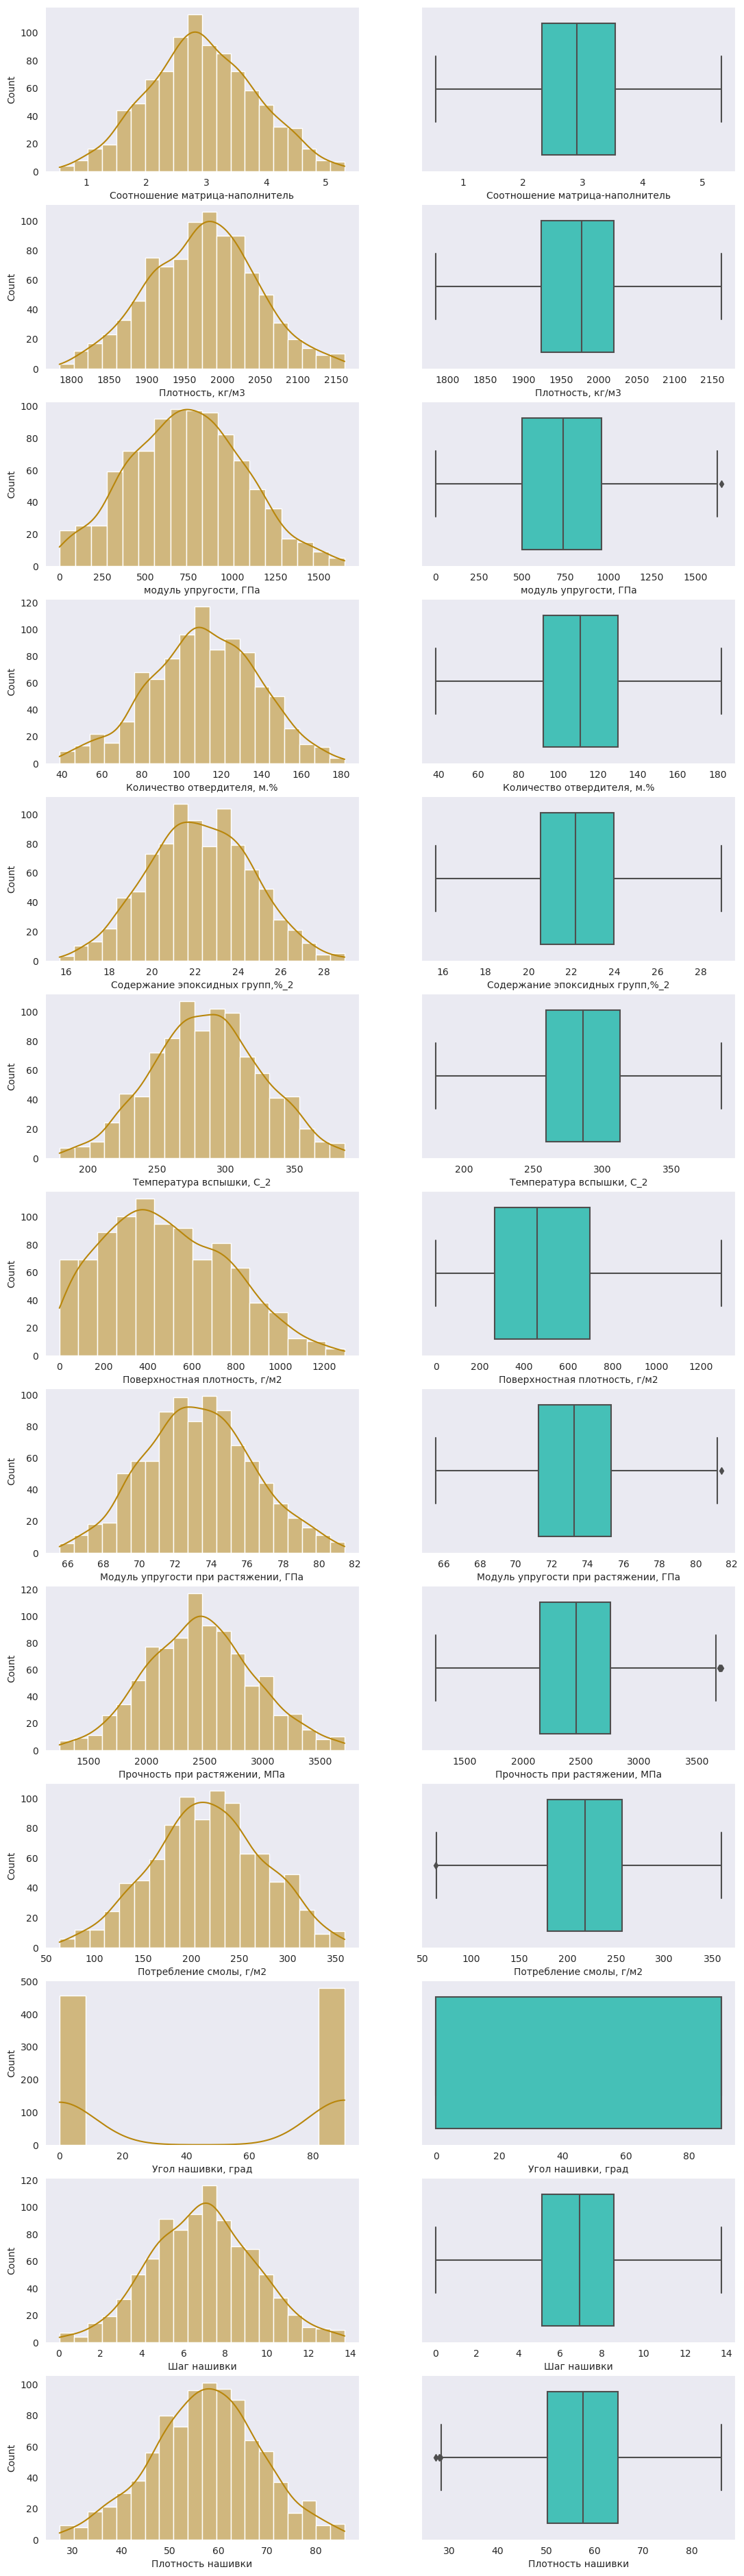

In [37]:
hist_and_box(df)

#### Попарные графики рассеяния точек

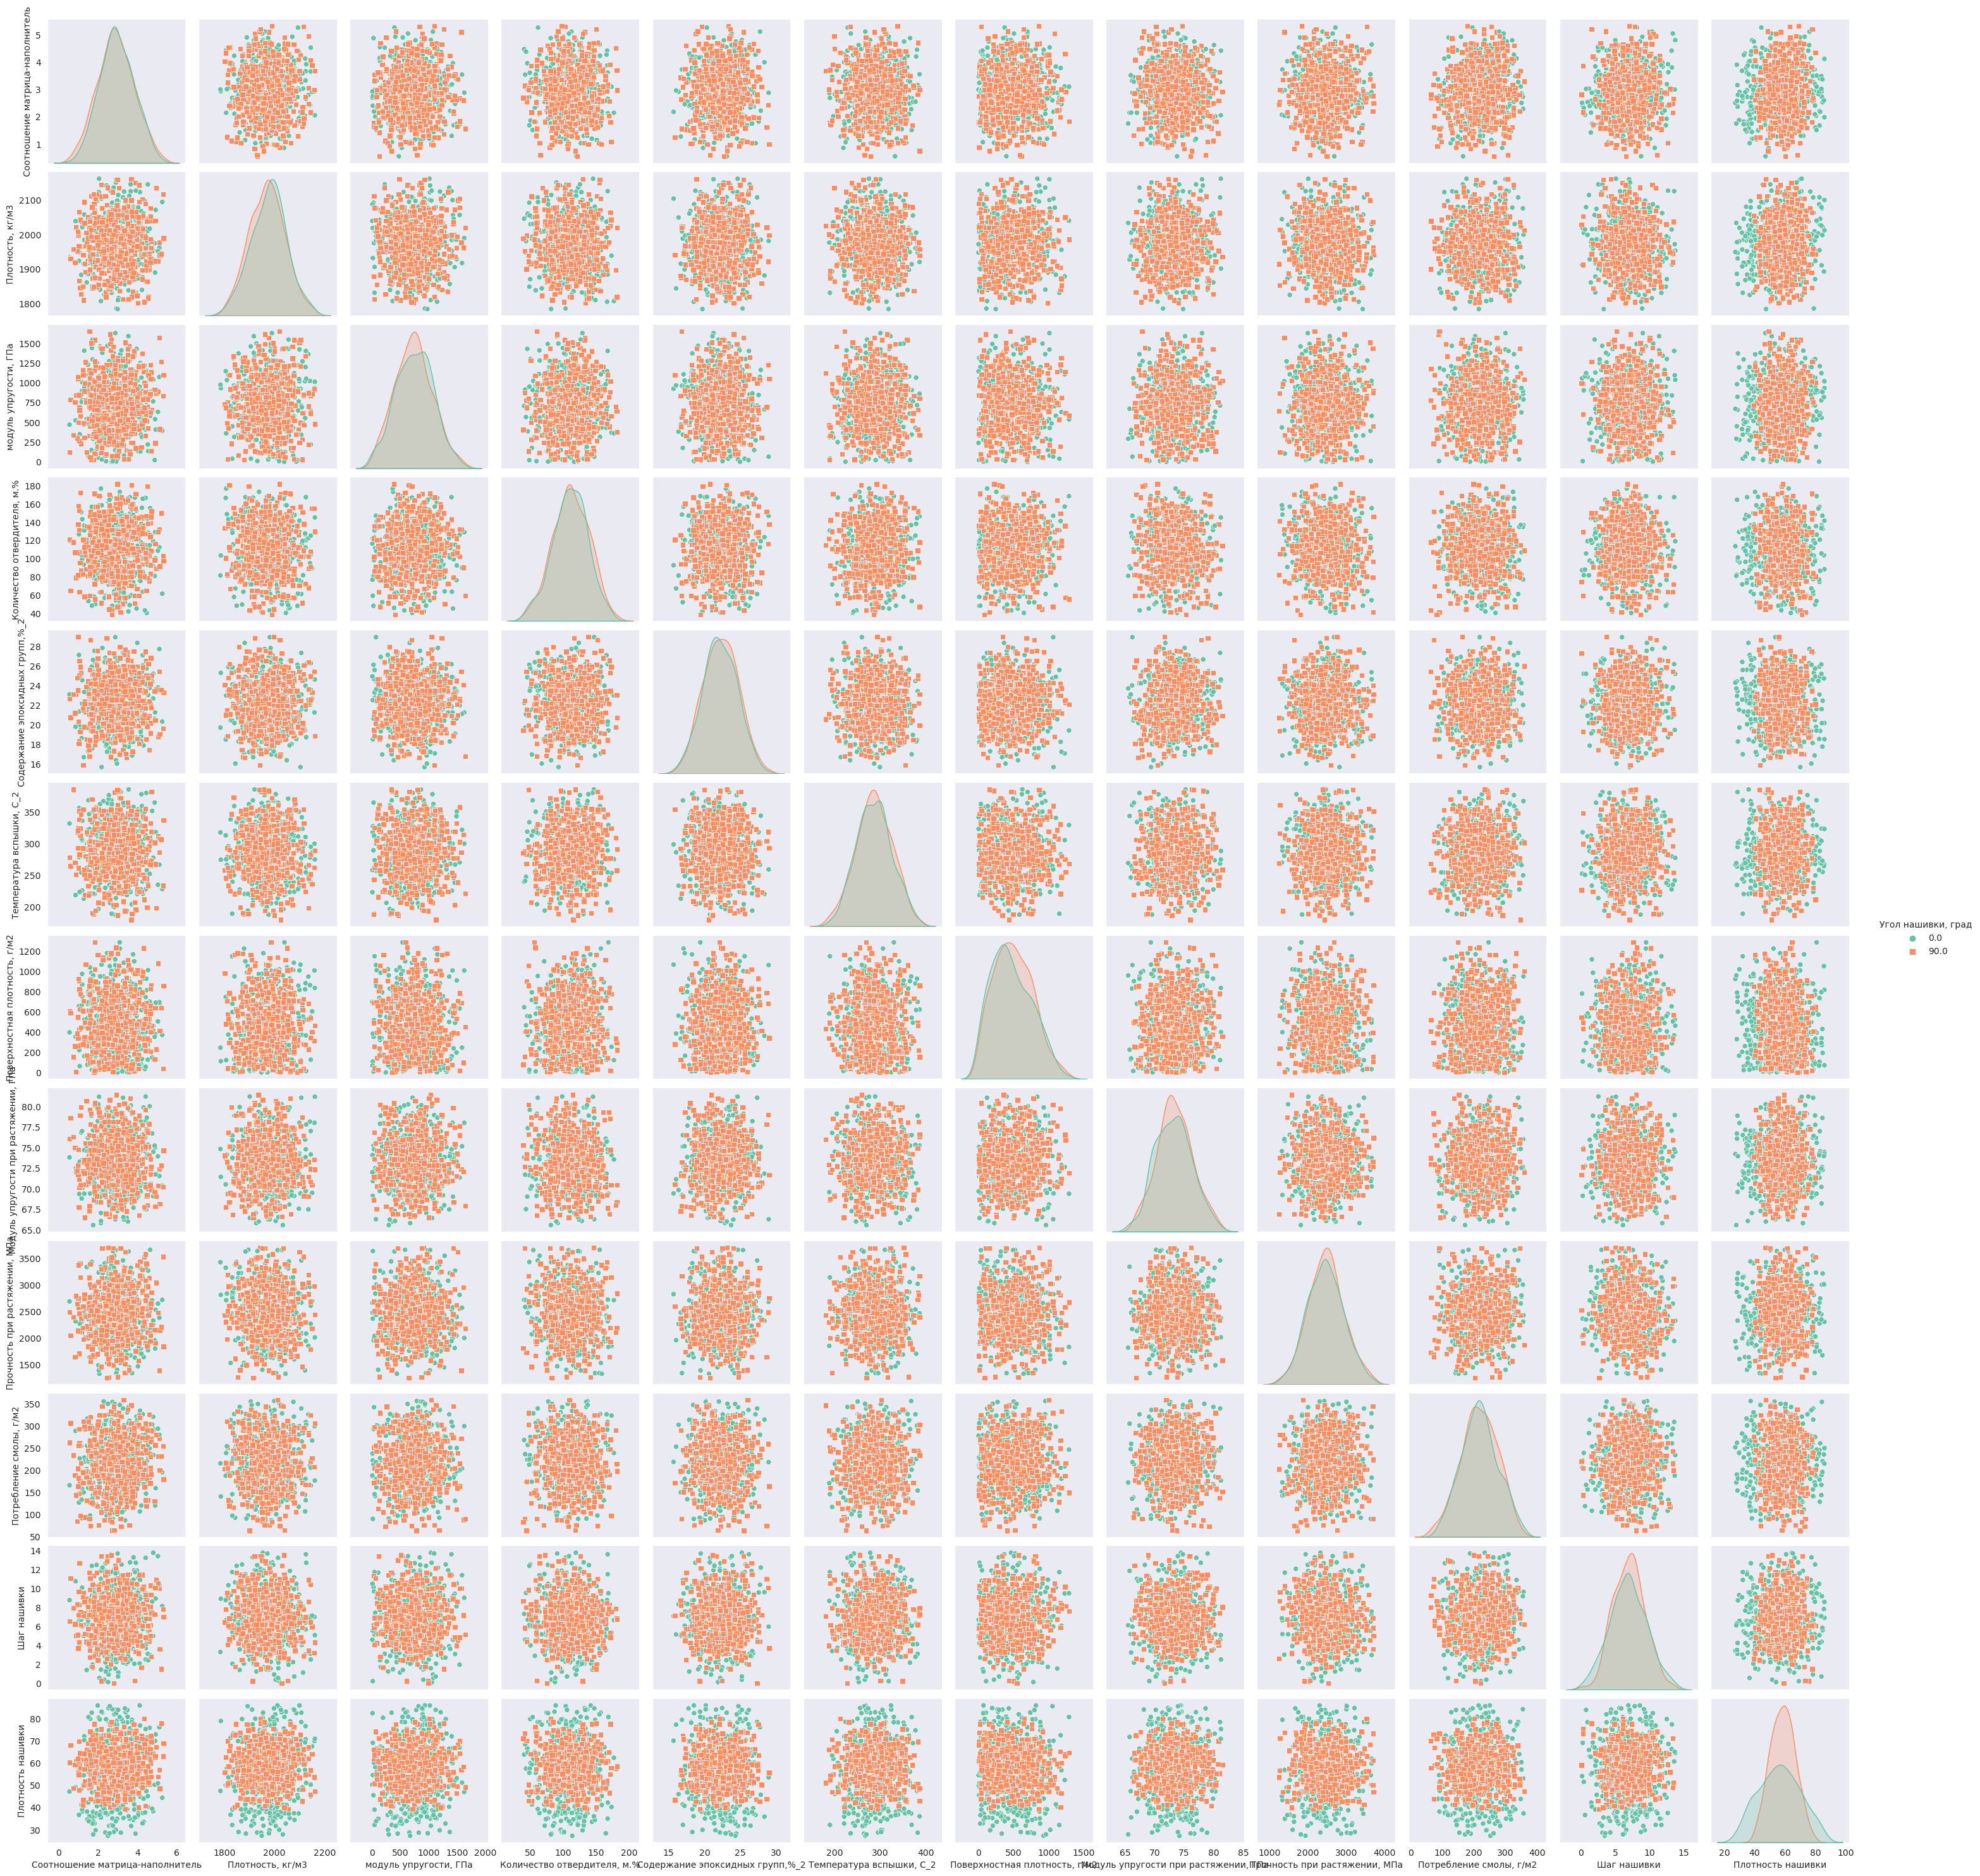

In [25]:
sns.pairplot(df, hue = 'Угол нашивки, град', markers=["o", "s"], diag_kind= 'auto', palette='Set2');

In [26]:
df.shape

(936, 13)

In [27]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

#### Балансировка данных

Так как в датасете почти отсутсвует корреляция и недостаточное количество данных, придется дополнительно добавить синтетические данные в датасет чтобы улучшить работу модели. Для этого воспользуемся библиотекой `ImbalancedLearningRegression`

In [84]:
df.reset_index(inplace = True,drop = True)

In [ ]:
df_mf_sm = smote(data=df,drop_na_col=True,drop_na_row=True, rel_coef=1.0, y='Соотношение матрица-наполнитель')
df_mf = ro(data=df_mf_sm ,drop_na_col=True,drop_na_row=True, rel_coef=1.0, y='Соотношение матрица-наполнитель')

In [85]:
df_adasyn_el = adasyn(data=df,drop_na_col=True,drop_na_row=True,  y='Модуль упругости при растяжении, ГПа')
df_el = ro(data=df_adasyn_el,drop_na_col=True,drop_na_row=True,  y='Модуль упругости при растяжении, ГПа')

r_index: 100%|##########| 301/301 [00:00<00:00, 4641.73it/s]


In [ ]:
df_smote_st = smote(data=df,drop_na_col=True,drop_na_row=True, y='Прочность при растяжении, МПа')
df_st = ro(data=df_smote_st,drop_na_col=True,drop_na_row=True,rel_coef=1.0, y='Прочность при растяжении, МПа')

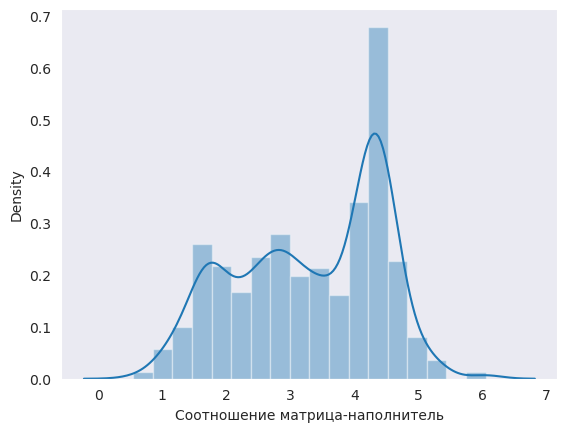

In [62]:
sns.distplot(df_mf ['Соотношение матрица-наполнитель']);

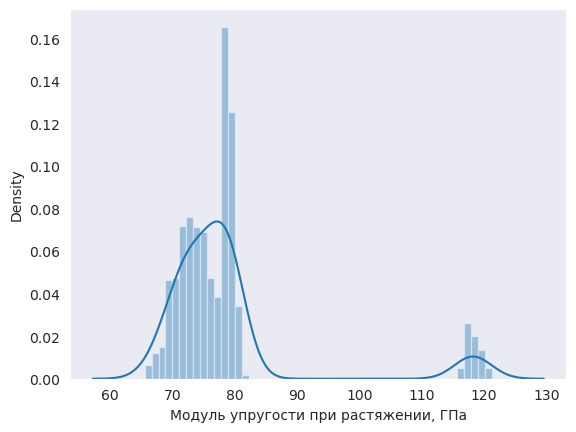

In [78]:
sns.distplot(df_el['Модуль упругости при растяжении, ГПа']);

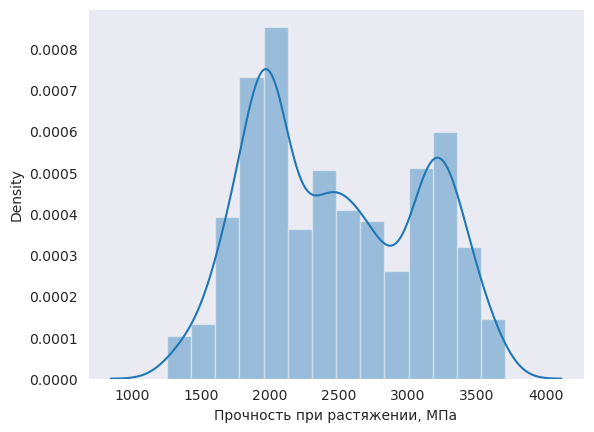

In [66]:
sns.distplot(df_st['Прочность при растяжении, МПа']);

#### Нормализация данных

In [70]:
min_max = MinMaxScaler()
df_norm_el = pd.DataFrame(min_max.fit_transform(df_el), columns = df_el.columns, index=df_el.index)
df_norm_st = pd.DataFrame(min_max.fit_transform(df_st), columns = df_st.columns, index=df_st.index)
df_norm_mf = pd.DataFrame(min_max.fit_transform(df_mf ), columns = df_mf .columns, index=df_mf .index)

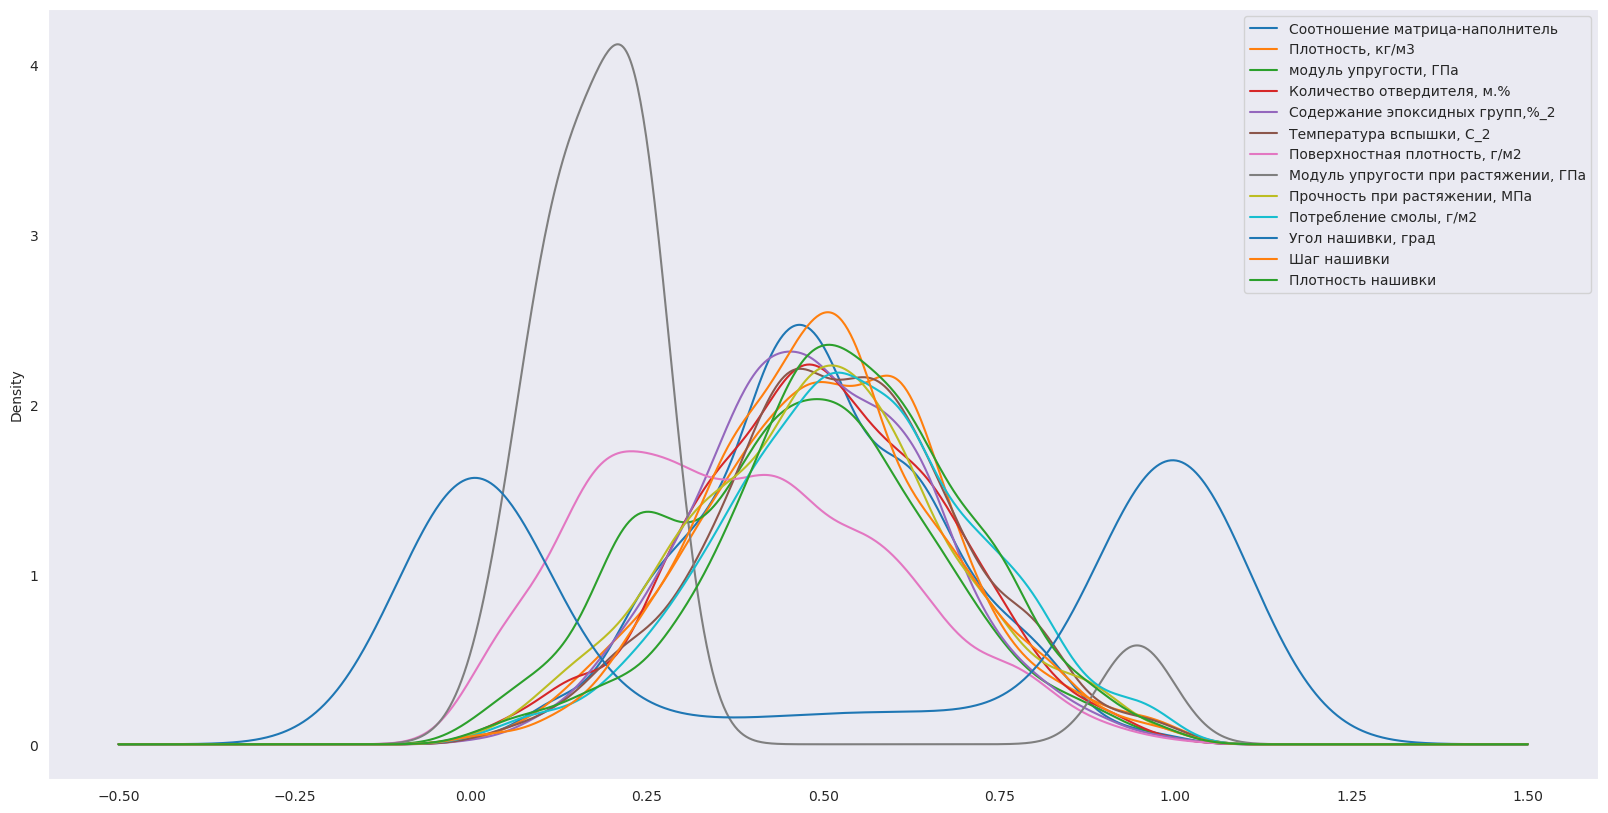

In [91]:
kde(df_norm_el)

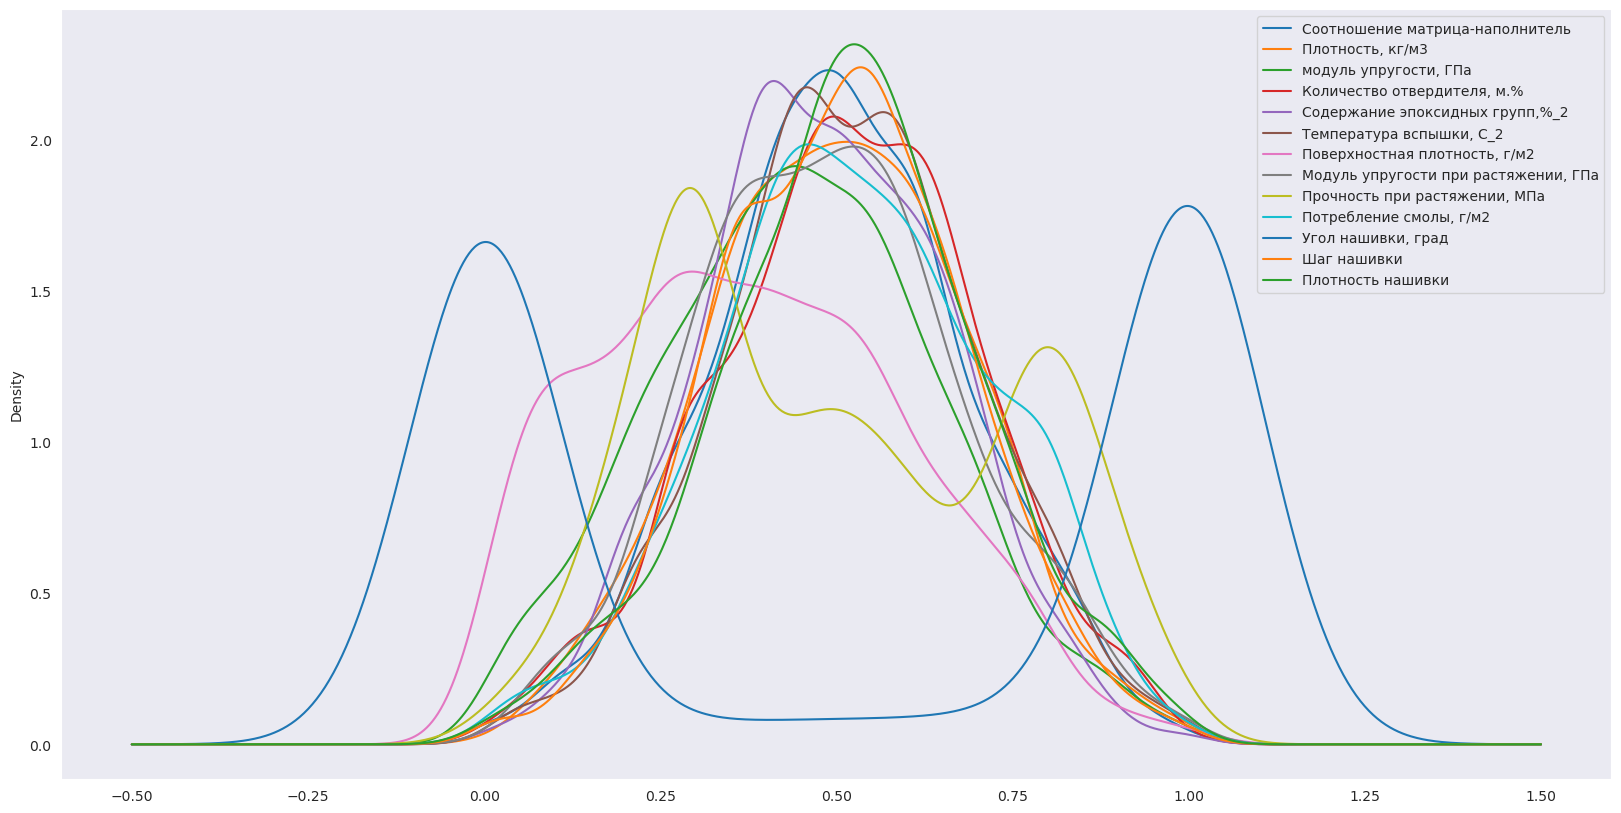

In [92]:
kde(df_norm_st)

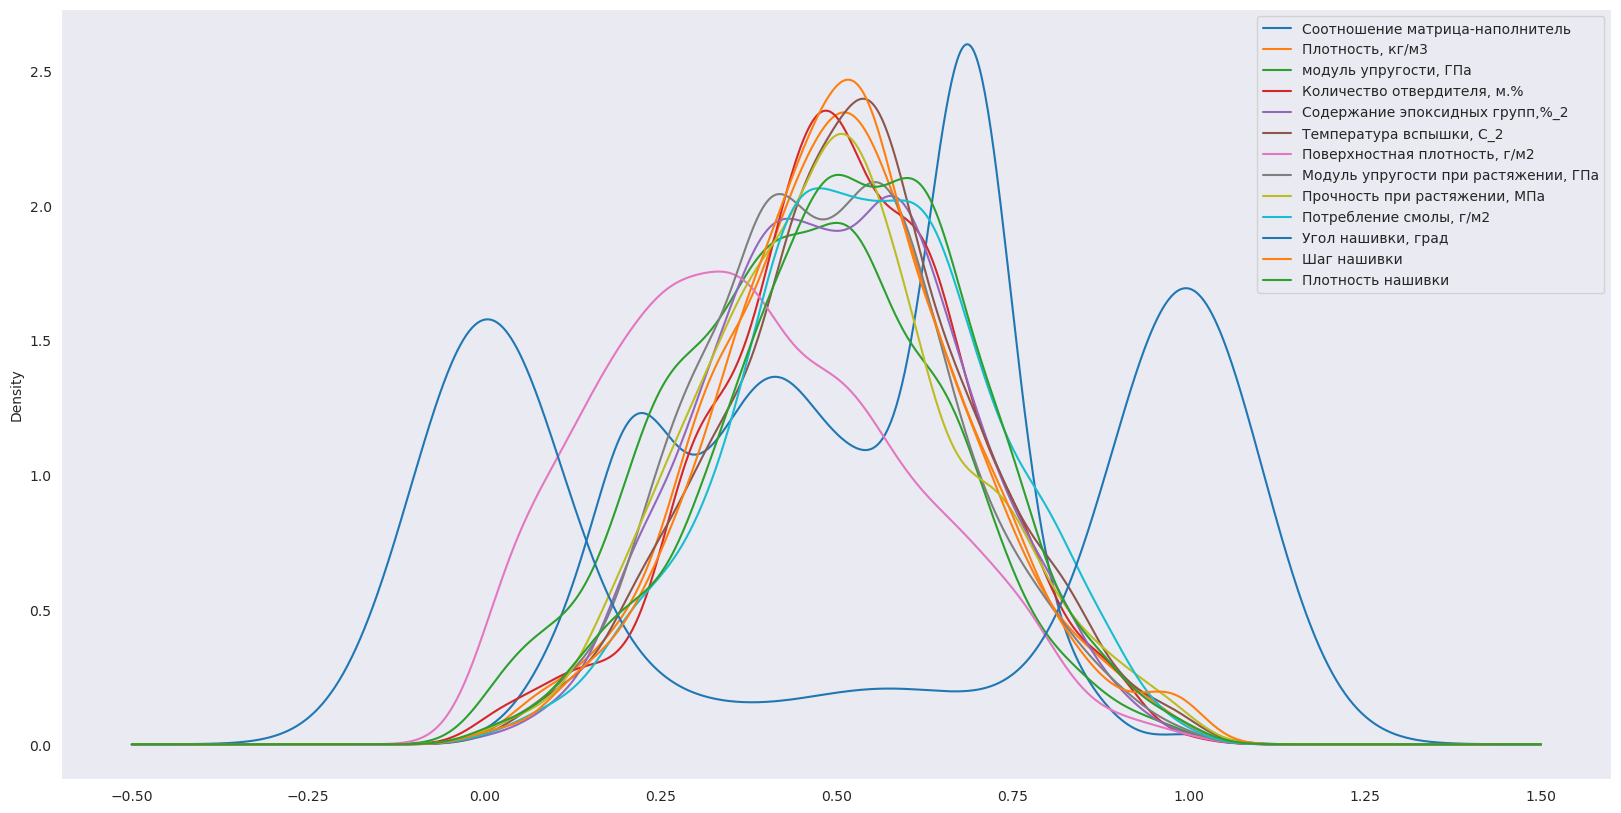

In [90]:
kde(df_norm_mf)

In [71]:
df_norm_el.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       1573.0  0.493922  0.173935  0.0   
Плотность, кг/м3                      1573.0  0.504886  0.177452  0.0   
модуль упругости, ГПа                 1573.0  0.452948  0.192658  0.0   
Количество отвердителя, м.%           1573.0  0.494694  0.178327  0.0   
Содержание эпоксидных групп,%_2       1573.0  0.487531  0.166470  0.0   
Температура вспышки, С_2              1573.0  0.519020  0.177392  0.0   
Поверхностная плотность, г/м2         1573.0  0.380612  0.208636  0.0   
Модуль упругости при растяжении, ГПа  1573.0  0.235416  0.216609  0.0   
Прочность при растяжении, МПа         1573.0  0.492951  0.186782  0.0   
Потребление смолы, г/м2               1573.0  0.535640  0.184070  0.0   
Угол нашивки, град                    1573.0  0.515128  0.470509  0.0   
Шаг нашивки                           1573.0  0.501566  0.170717  0.0   
Плотность нашивки                     1573.0  0.532122  0.177110  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.382441  0.488209  0.616360  1.0  
Плотность, кг/м3                      0.386820  0.508281  0.622042  1.0  
модуль упругости, ГПа                 0.303617  0.459736  0.579825  1.0  
Количество отвердителя, м.%           0.370333  0.492540  0.624242  1.0  
Содержание эпоксидных групп,%_2       0.374410  0.484606  0.600314  1.0  
Температура вспышки, С_2              0.404402  0.520172  0.637763  1.0  
Поверхностная плотность, г/м2         0.213848  0.363665  0.536967  1.0  
Модуль упругости при растяжении, ГПа  0.126249  0.194135  0.240811  1.0  
Прочность при растяжении, МПа         0.364430  0.493830  0.611272  1.0  
Потребление смолы, г/м2               0.412876  0.531335  0.653760  1.0  
Угол нашивки, град                    0.000000  0.579606  1.000000  1.0  
Шаг нашивки                           0.384770  0.498796  0.604767  1.0  
Плотность нашивки                     0.426971  0.530633  0.650741  1.0

In [72]:
df_norm_st.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       1773.0  0.503662  0.179237  0.0   
Плотность, кг/м3                      1773.0  0.501413  0.181471  0.0   
модуль упругости, ГПа                 1773.0  0.444842  0.198246  0.0   
Количество отвердителя, м.%           1773.0  0.514913  0.186587  0.0   
Содержание эпоксидных групп,%_2       1773.0  0.483747  0.172255  0.0   
Температура вспышки, С_2              1773.0  0.517517  0.179134  0.0   
Поверхностная плотность, г/м2         1773.0  0.380515  0.220123  0.0   
Модуль упругости при растяжении, ГПа  1773.0  0.490430  0.188307  0.0   
Прочность при растяжении, МПа         1773.0  0.500186  0.247821  0.0   
Потребление смолы, г/м2               1773.0  0.524325  0.192831  0.0   
Угол нашивки, град                    1773.0  0.517423  0.485734  0.0   
Шаг нашивки                           1773.0  0.506134  0.175218  0.0   
Плотность нашивки                     1773.0  0.519450  0.184929  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.388361  0.499814  0.622300  1.0  
Плотность, кг/м3                      0.376312  0.501605  0.627761  1.0  
модуль упругости, ГПа                 0.304218  0.444649  0.578896  1.0  
Количество отвердителя, м.%           0.391089  0.517263  0.643876  1.0  
Содержание эпоксидных групп,%_2       0.368122  0.484385  0.607554  1.0  
Температура вспышки, С_2              0.401684  0.515669  0.635493  1.0  
Поверхностная плотность, г/м2         0.206505  0.372368  0.539446  1.0  
Модуль упругости при растяжении, ГПа  0.354910  0.487331  0.613795  1.0  
Прочность при растяжении, МПа         0.289613  0.474518  0.749927  1.0  
Потребление смолы, г/м2               0.393951  0.521943  0.657091  1.0  
Угол нашивки, град                    0.000000  0.707592  1.000000  1.0  
Шаг нашивки                           0.377322  0.508925  0.629849  1.0  
Плотность нашивки                     0.398987  0.522089  0.637637  1.0

In [73]:
df_norm_mf.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       1666.0  0.501518  0.205900  0.0   
Плотность, кг/м3                      1666.0  0.503850  0.177630  0.0   
модуль упругости, ГПа                 1666.0  0.451763  0.192562  0.0   
Количество отвердителя, м.%           1666.0  0.508476  0.177909  0.0   
Содержание эпоксидных групп,%_2       1666.0  0.502778  0.177589  0.0   
Температура вспышки, С_2              1666.0  0.519269  0.179822  0.0   
Поверхностная плотность, г/м2         1666.0  0.382778  0.210044  0.0   
Модуль упругости при растяжении, ГПа  1666.0  0.489307  0.178169  0.0   
Прочность при растяжении, МПа         1666.0  0.498015  0.186914  0.0   
Потребление смолы, г/м2               1666.0  0.537340  0.180542  0.0   
Угол нашивки, град                    1666.0  0.514660  0.470096  0.0   
Шаг нашивки                           1666.0  0.511907  0.176409  0.0   
Плотность нашивки                     1666.0  0.524474  0.180563  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.335759  0.528891  0.678263  1.0  
Плотность, кг/м3                      0.387056  0.505023  0.617055  1.0  
модуль упругости, ГПа                 0.311698  0.451826  0.583474  1.0  
Количество отвердителя, м.%           0.401877  0.506532  0.630983  1.0  
Содержание эпоксидных групп,%_2       0.374410  0.500302  0.628215  1.0  
Температура вспышки, С_2              0.405498  0.524911  0.634265  1.0  
Поверхностная плотность, г/м2         0.221671  0.363657  0.534390  1.0  
Модуль упругости при растяжении, ГПа  0.367333  0.490425  0.606509  1.0  
Прочность при растяжении, МПа         0.369925  0.492663  0.609636  1.0  
Потребление смолы, г/м2               0.420546  0.534846  0.656168  1.0  
Угол нашивки, град                    0.000000  0.569198  1.000000  1.0  
Шаг нашивки                           0.397572  0.509787  0.625333  1.0  
Плотность нашивки                     0.404829  0.530269  0.644932  1.0

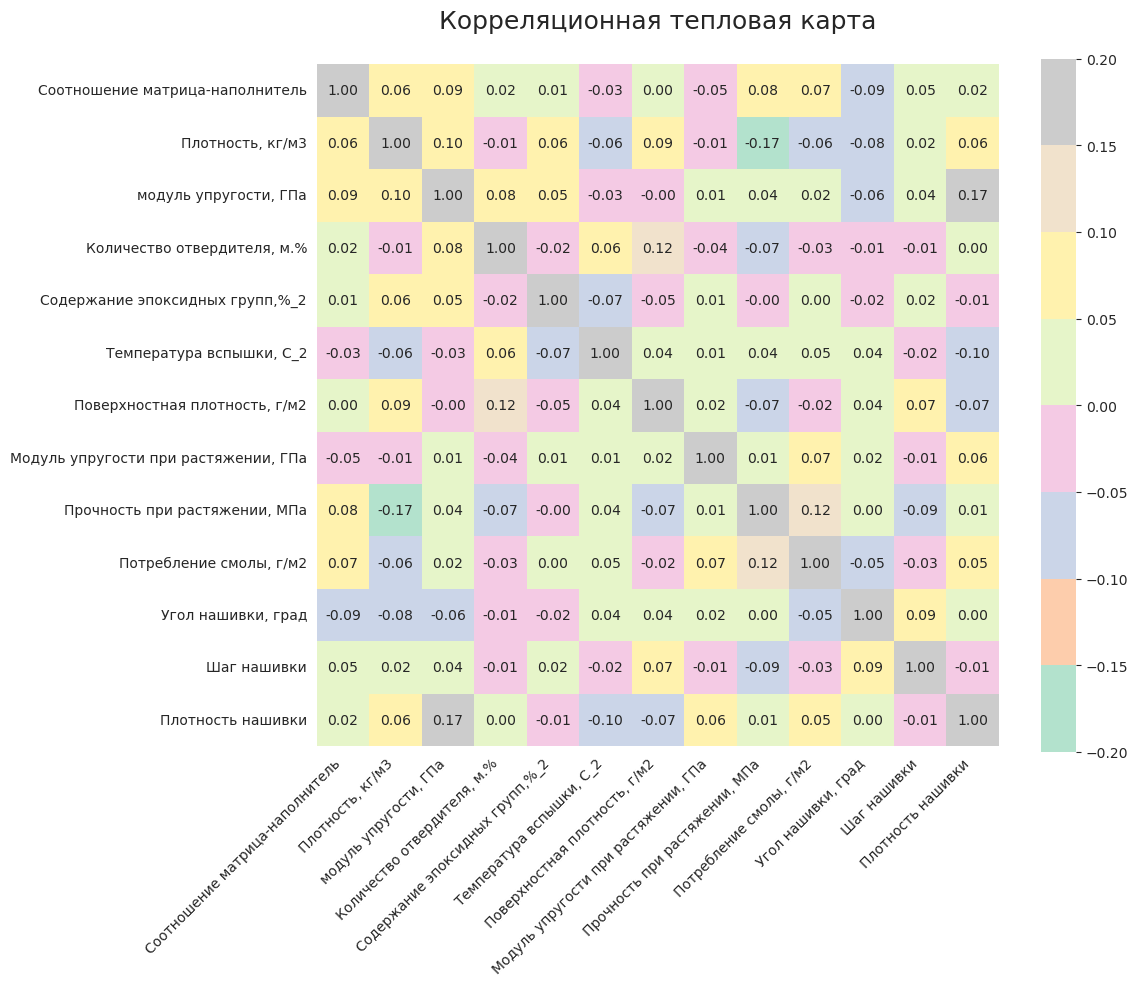

In [74]:
correlations = df_norm_el.corr()
heat_map(correlations)

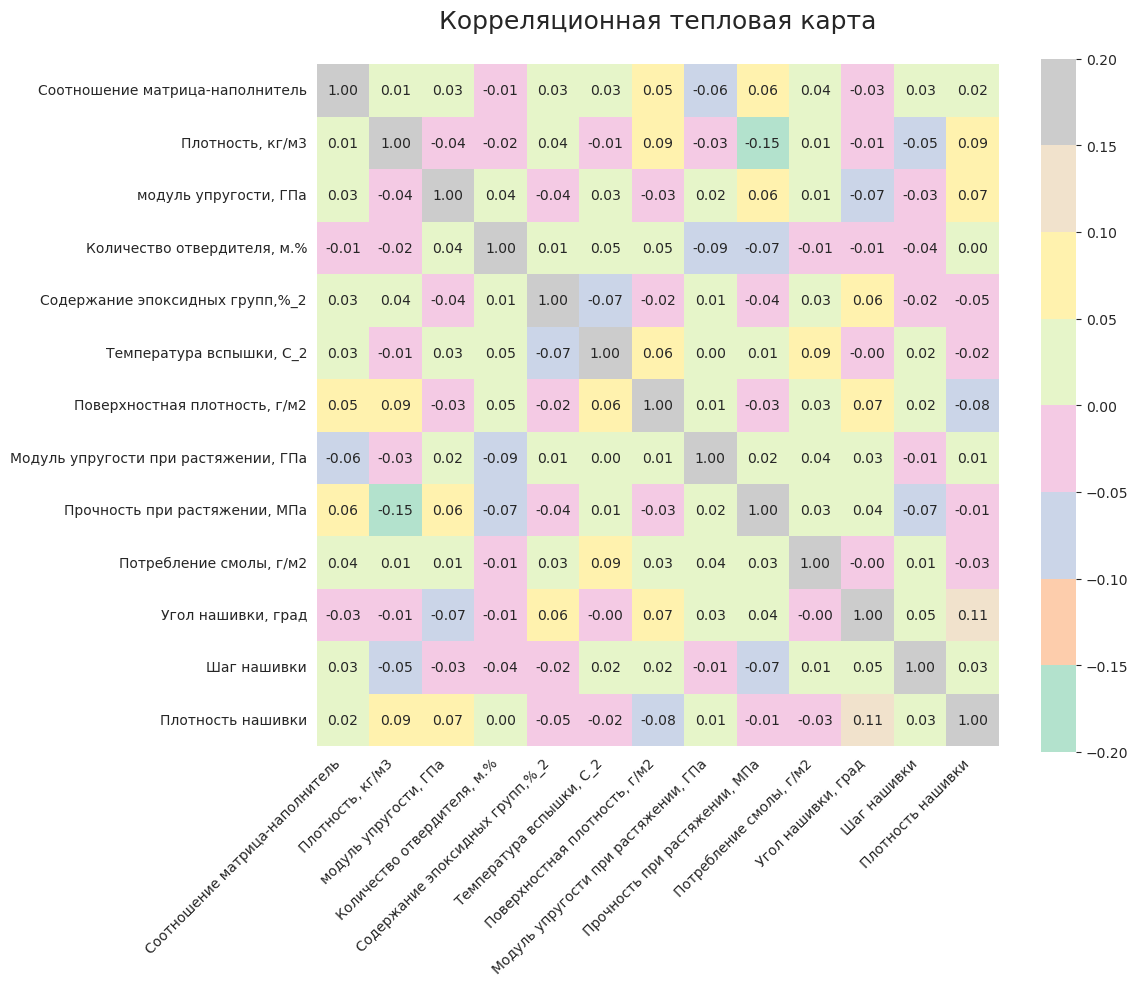

In [75]:
correlations = df_norm_st.corr()
heat_map(correlations)

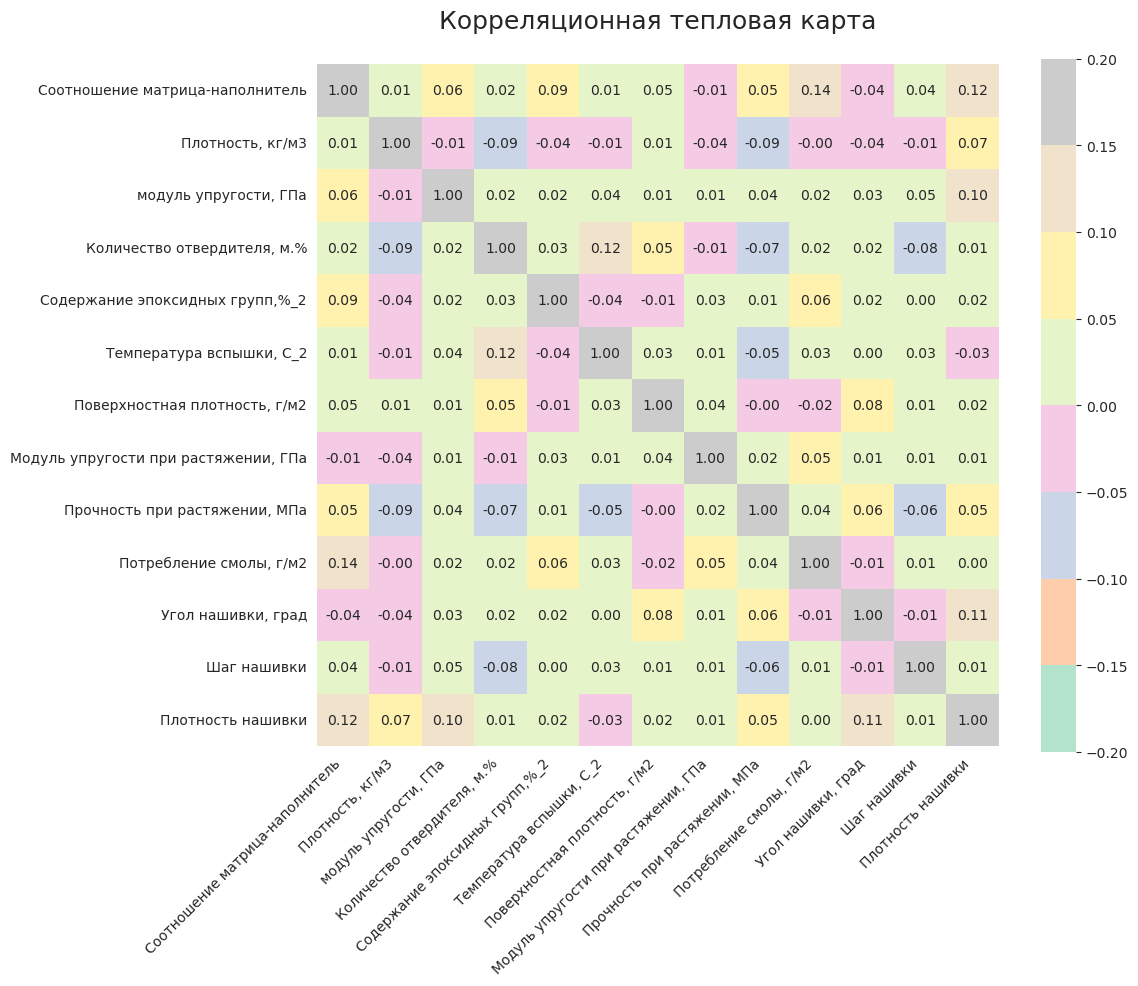

In [76]:
correlations = df_norm_mf.corr()
heat_map(correlations)

#### Сохранение отдельных датасетов для  модуля упругости при растяжении, прочности при растяжении и соотношение матрица-наполнитель

In [77]:
#Сохраним предобработанные датасеты для загрузки в отдельный файл где будет обучаться модель
df_norm_el.to_csv('./datasets/elasticity_model_vkr.csv')
df_norm_st.to_csv('./datasets/strength_model_vkr.csv')
df_norm_mf.to_csv('./datasets/matrix_model_vkr.csv')